This program imports and plots data from the PicoHarp300 for Time-resolved Photoluminescence (TRPL)

We are interested in fitting the decay curves using a decaying exponential function ~e^(-gamma t)

In [1]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import time
import os.path
import scipy as sp
from scipy import interpolate
import scipy.optimize
print(plt.get_backend())

# %matplotlib inline

module://ipykernel.pylab.backend_inline


In [2]:
#### begin user-modified area: ####
# filepath = r"../../2017_11_06"
# base_name = 'PDM_fluor_11'

filepath = r"./"
base_name = 'DUT'


filename_suffix = 'dat'
xaxis_label = 'time (ns)'
yaxis_label = 'Intensity (cts)'
titlestuff = 'TRPL signal (cts)'

#### end user-modified area ####

#importing data
def load_data(dir_name,base_name,filename_suffix,SkipHeaderLines):
    filepath = os.path.join(dir_name, base_name + "." + filename_suffix)
    data = np.genfromtxt(filepath,
                     skip_header=8,
                     delimiter=',')
    return data

# find important header info:
data_head = load_data(filepath,base_name,filename_suffix,8)
ns_per_channel = data_head[0]

# load the data:
data = load_data(filepath,base_name,filename_suffix,10)
length_of_data = np.size(data[:])

x_axisboundary =  ns_per_channel*length_of_data
x_values = np.arange( 0, x_axisboundary, ns_per_channel )
# y_values = np.zeros( ( NumFiles,length_of_data) )
y_values= data[:] 

In [3]:
ns_per_channel

0.004

In [4]:
x_values[2]

0.008

In [5]:
os.path.join(filepath, base_name + "." + filename_suffix)

'./DUT.dat'

In [6]:
len(y_values)

65537

In [14]:
ns_per_channel*length_of_data

262.148

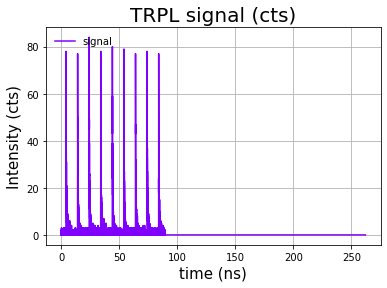

In [7]:
NumFiles=2
colors = cm.rainbow(np.linspace(0, 1, NumFiles))

plt.figure(1)
plt.clf()
j=0
plt.plot(x_values,y_values,label="signal",color=colors[j])  #label=filenames[j]
plt.xlabel(xaxis_label,fontsize=15)
plt.ylabel(yaxis_label,fontsize=15)
plt.grid()
plt.title(titlestuff,fontsize=20)
#plt.ylim([-4.6,-3])
# plt.ylim([10,10**3])
# plt.xlim([0,30])
#plt.xlim([500,950])
plt.legend(frameon=False,loc=2) 
# Info about legend:
#    http://matplotlib.org/api/legend_api.html
# plt.savefig('TRPL_test1.png')
plt.show()


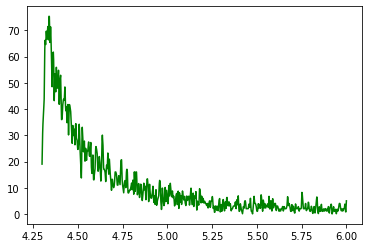

In [8]:
xmin = 4.3
xmax = 6


x_ROI = np.linspace(xmin,xmax,1000)
# x_ROI = np.linspace(-1.6,-1.0,1000)


f = sp.interpolate.interp1d(x_values,y_values)
y_ROI = f(x_ROI) 
plt.plot(x_ROI,y_ROI,'-g')
plt.show()

In [9]:
x_ROI[1]

4.301701701701702

In [10]:
def ExponDecay(x_val, x_0, A,decay_time):
    return A*np.exp(-(x_val-x_0)/decay_time)

# here start is at first point:
def ExponDecaySIMPLE(x_val,A,decay_time):
    return A*np.exp(-(x_val-x_val[0])/decay_time)

[  4.1351371  108.42754697   0.29481306]
Our fitted values:
time start: 4.1351 ns
amplitude : 108.4275 counts
decay time: 0.2948 ns


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in sqrt
  


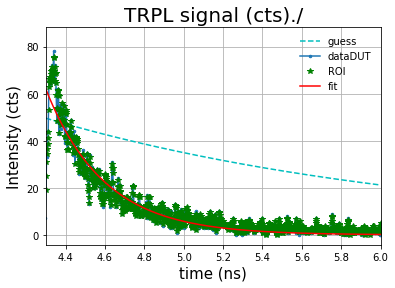

In [11]:
# Fitting procedure:

# generate a guess (guesses help the process)
x_0 = 3 # overall offset
A   = 95    # amplitude
decay_time   = 2        # in ns here

p_guess = [x_0,A,decay_time]


# do curve fit:
peak, pcov = scipy.optimize.curve_fit(ExponDecay, x_ROI, y_ROI, p0 = p_guess)
print(peak)
perr = np.sqrt(np.diag(pcov))


# plot results
plt.plot(x_ROI, ExponDecay(x_ROI, *p_guess), 'c--',label='guess')
plt.plot(x_values,y_values,'.-',markersize=5,label='data'+base_name)

plt.plot(x_ROI, y_ROI, 'g*',label='ROI')
plt.plot(x_ROI, ExponDecay(x_ROI, *peak), 'r',label='fit')
# plt.tight_layout() 
plt.legend(frameon=False,loc='best') 
plt.grid()
plt.xlabel(xaxis_label,fontsize=15)
plt.ylabel(yaxis_label,fontsize=15)

plt.title(titlestuff+filepath,fontsize=20)
plt.xlim([xmin,xmax])

print('Our fitted values:')
print('time start: %4.4f'%(peak[0])+' ns')
print("amplitude : %4.4f"%(peak[1])+" counts")
print("decay time: %4.4f"%(peak[2])+" ns")


In [12]:
p_guess

[3, 95, 2]

## Simpler decaying exponential fit:
Let's have the start point for the decay be the beginning of wherever I chose my ROI...

[61.98444046  0.2948066 ]
Our fitted values:
time start: 4.3000 ns
amplitude : 61.9844 counts
decay time: 0.2948 ns


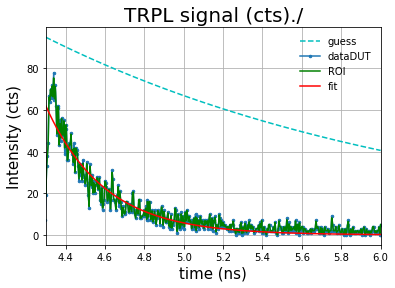

In [13]:
#best fit lines (guesses help the process)
p_guess = [A,decay_time]
peak, pcov = scipy.optimize.curve_fit(ExponDecaySIMPLE, x_ROI, y_ROI, p0 = p_guess)
print(peak)
perr = np.sqrt(np.diag(pcov))


plt.plot(x_ROI, ExponDecaySIMPLE(x_ROI, *p_guess), 'c--',label='guess')
plt.plot(x_values,y_values,'.-',markersize=5,label='data'+base_name)
plt.plot(x_ROI, y_ROI, 'g-',label='ROI')
plt.plot(x_ROI, ExponDecaySIMPLE(x_ROI, *peak), 'r',label='fit')

# plt.tight_layout() 
plt.legend(frameon=False,loc='best') 
plt.grid()
plt.xlabel(xaxis_label,fontsize=15)
plt.ylabel(yaxis_label,fontsize=15)
plt.xlim([xmin,xmax])


plt.title(titlestuff+filepath,fontsize=20)
# plt.xlim([2.6,3])
print('Our fitted values:')
print('time start: %4.4f'%(x_ROI[0])+' ns')
print("amplitude : %4.4f"%(peak[0])+" counts")
print("decay time: %4.4f"%(peak[1])+" ns")
